# Transport Layer

In previous classes, we discussed the network interface and intenet layers. See the figure below for the layers of a typical intenet network.

Recall, the network interface layer is comprised of the physical layer (cables, devices, wrireless frequencies) used to transmit bits from one device to another that share a common medium (cable, over the air). Each device has a low-level MAC address that identifies it in the network (e.g. f4:d1:08:85:2e:b0).

The internet layer is responsible with trasmitting data packets from source to destination. A packet has a maximum size of 65,535 bytes. The network layer **does not** provide any delivery guarantees. It is similar to the first-class mail, or the cell-phone text messaging. Most of the times the messages arrive at the destination, but sometimes they do not, and sometimes the package is open and content is missing or damaged.

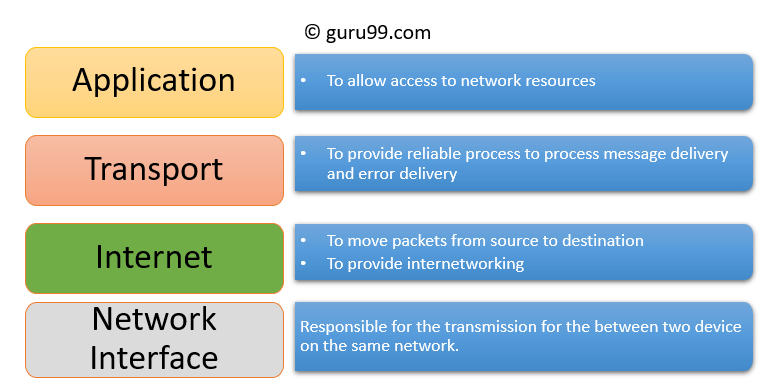

## The Transport Layer

The role of the **transport layer** is to provide efficient and reliable data transmission service to the applications running on a device. 

The transport layer uses the internet layer to transmit packets from source to destination including
1. At the source 
    1. Split the data into packets 
    2. Send packets to the destination.
    3. Resend packets that were lost or damaged.
2. At the destination
    1. Reassemble the packages in the correct order, even though they were received out of order
    2. Detect if a packet is missing and ask for retransmission.


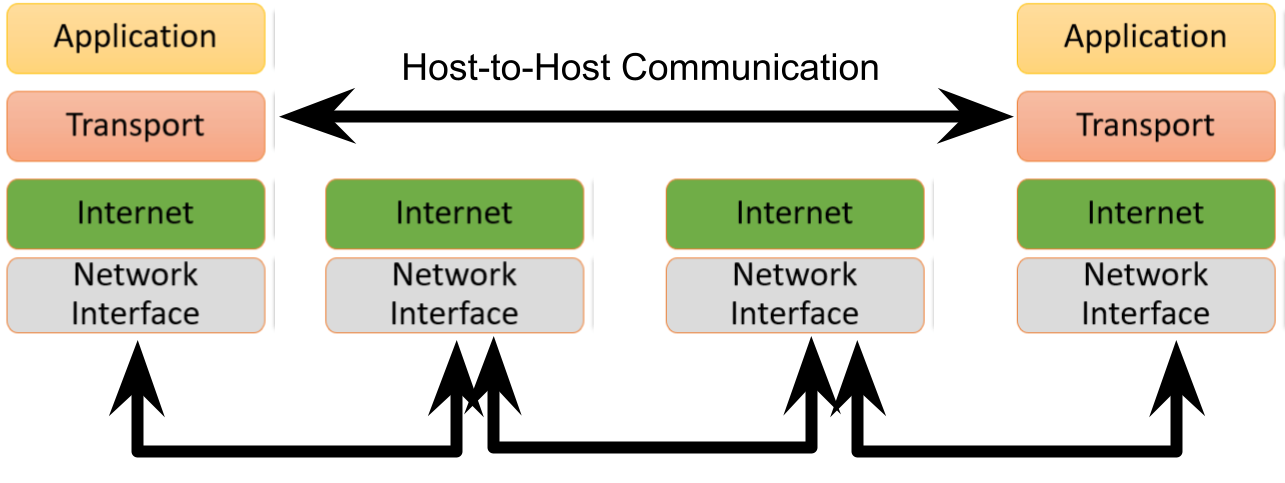

## Connection-Oriented Transport Protocol

A connection oriented transport protocol is like a phone call. In a phone call we can identify the following steps:
1. Connection Request: Alice makes a call and the phone rings.
2. Connection Acknowledged: Bob answers the phone and says *Hello!*
3. Connection Established: Alice says *Hello!*
4. Data Transmission: Alice and Bob take turns talking.
5. Disconnect Request: Alice says *Bye!*
6. Disconnect Acknowledged: Bob says *Bye!* 


## Establish Connection

The following steps are used to establish a connection between two devices. See part (a) of the image below.


*Host 1* wants to establish a connection with *Host 2*. The first step of *Host 1* is sending a packet of type connection request, for example: *CR(seq=57)*. The *seq* parameter specifies an indentifier used to mark the first data package.

After receiving the connection request message, *Host 2* sends an acknowledgement packet, *ACK(seq=23, ack=57)*. In this packet the *Host 2* says that their first packet will be marked with the identifier 23 and that it knows the sender will mark its first packet with identifier 57.

Finally, the last step is for *Host 1* to send its first data packet, *DATA(seq=57, ack=23)*. With this packet the sender tells the receiver that this is the first packet and that it received the ACK packet.

Part (b) of the figure below shows the protocol steps for dealing with a duplicate connection request packet received after *Host 1* processed an ACK for the connection request. Since *Host 2* does not know yet that *Host 1* received the ACK packet, it will generate a new sequence number and send a new ACK packet. Since *Host 1* already processed the previous ACK packet, then it will send a message to *Host 2* that it rejects this new ACK.

In part (c) of the figure, you can see the steps followed when *Host 2* receives both an old duplicate of a connection request and a data packet.

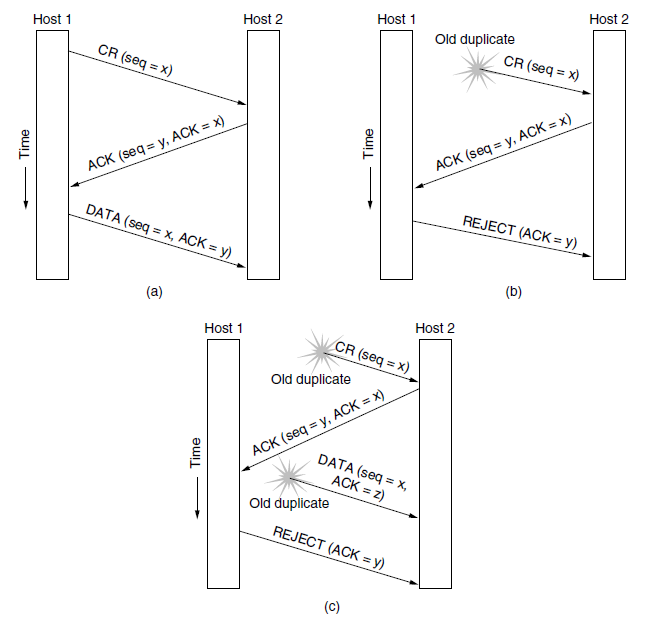

## Data Transmission

*Host 2* sends back a packet to acknowledge it received packet with identifier 57, *DATA(seq=23, ack=57)*.

Now, *Host 1* is ready to send their next packet with the next identifier and acknowledge they received the packet with identifier 23: *DATA(seq=58, ack=24)*.

*Host 2* sends *DATA(seq=24, ack=59)*.

The protocol continues until *Host 1* or *Host 2* initiate a termination of the connection, or one of the hosts becomes unreachable.

### The Sliding Window Protocol

To speed up the communication, each host may allow some number of packets to be sent and unacknowledged. 

For example, *Host 1* may send in a rapid succession three packets: *DATA(seq=59, ack=24)*, *DATA(seq=60, ack=24)*, and *DATA(seq=61, ack=24)*. Then it stops to wait for ACKs.

*Host 2* may receive *DATA(seq=59, ack=24)*, and send an *ACK(seq=25, ack=59)*. 

Upon receiving *ACK(seq=25, ack=59)*, *Host 1* may send another data packet *DATA(seq=61, ack=25)*.

If *Host 2* receives *DATA(seq=61, ack=24)* before the previous two packets, thenn it will not ACK this packet, but wait for the other two packets.

Eventually, *Host 2* receives *DATA(seq=61, ack=24)*, *DATA(seq=60, ack=24)*. *Host 2* sends an ACK packet to *Host 1*, *DATA(seq=26, ack=62)*.

When *Host 1* receives the *DATA(seq=26, ack=61)*, it knwos that *Host 2* received all the packets up to 62, and can send a new burst of three packets.


In this version of the sliding window protocol, the receiver stores up to 3 packets and the *ACK* parameter indicates that all the packets with smaller sequence numbers have been received.


## Release Connection

Recall that the transport layer is tasked with a reliable point-to-point connection, wich includes no data loss. To avoid data loss, a host can not simply close the connection after it finished sending its data. On the other hand, a host can not keep sending packets if they are not acknowledged and must terminate a connection if the other host stopped responding.

A three step release connection protocol is shown in the figure below. Part (a) shows a release connection when no packets are lost. *Host 1* initiates the release connection by sending a disconnect request, *DR* packet, and sets a timer to wait for *Host 2* to respond. *Host 2* replies with a disconnect request of its own and also sets a timer. Next, *Host 1* sends an acknowledgement and closes the connection. After receiving the *ACK* packet, *Host 2* also closes the connection.

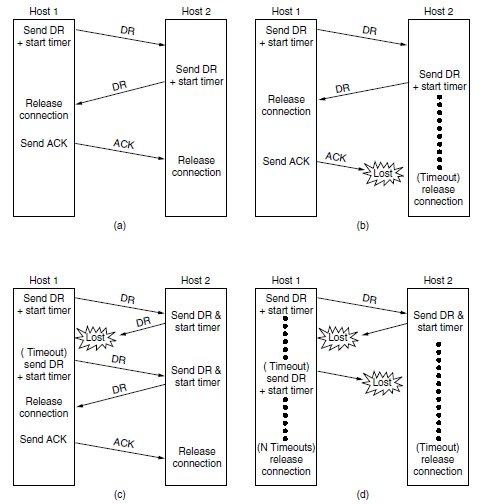

### Activity

1. Mrs. Evans wants to send 10 cards with geometry problems for the next class to Mr. McCrory over a network of studious, but sometimes unrealiable students.

2. Mrs. Evans first makes a connection request to Mr McCrory following the steps shown in the picture below.
    1. Mrs. Evans sends an index card with the following content *CR(seq=57)*
    1. Mr. McCrory sends back an index card with the content *ACK(seq=23, ACK=57)*
    1. Mrs. Evans sends problem 1 with the content *DATA(seq=57,ACK=23)*
    1. To speed up the process, Mrs. Evans keeps a window of three unacknowledged data packets. She sends problem 2 with the content *DATA(seq=58,ACK=23)*
    1. Mrs Evans sends problem 3 with the content *DATA(seq=59,ACK=23)*
    
3. Mr. Mc Crory receives the card with problem 2 and stores it.

3. Mr. Mc Crory receives the card with problem 1 and sends an index card back with the content *DATA(seq=24, ACK=58)*

3. Mrs. Evans receives the ack of for problems 1 and 2. 

3. Mrs. Evans receives the ack of for problem 2. Now Mrs. Evans knows that Mr. McCrory received problems 1 and 2 and may send two more problems.

The activity continues using the following rules:
1. Students can decide to drop a card (never deliver it) at most once per activity.
1. Students can decide to delay the delivery of a card (no more that 10 seconds).
1. Two students are to record the packets sent through the network.
1. Two students mainatain the sequence numbers for sender and receiver.
1. Two students maintain the acknowledgments received by the sender and receiver.

## Conclusion 

Today, we learned the following:
1. The transport layer function
2. A set of rules, called protocol, two hosts can establish a connection.
3. A sliding window protocol for sending data packets from source to destination.